#  Analiza fanfictionov

##  Vključevanje knjižnic

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datetime import date

##  Nalaganje podatkov

In [2]:
def loadff():
    ffji = pd.read_csv("ffs_processed.csv", index_col="id", delimiter="\t")
    dates = ffji.last_updated.apply(date.fromisoformat)
    ffji.drop(columns=("last_updated"), inplace=True)
    ffji["last_updated"] = dates
    ffji["avg_chapter_length"] = (ffji["words"] /
        ffji["chapters_written"]).apply(int)
    ffji["lhits"] = ffji.hits.apply(np.log)
    return ffji
ffji = loadff()

In [3]:
ffji

title  author  \
id                                                       
0                              A Gamer Odyssey       6   
1                                        Evans      30   
2                              The Secret Door       1   
3                                   Synkardiás    1262   
4                       Professor Sirius Black       2   
...                                        ...     ...   
64320  Zo Hawk and the Legacy of the Marauders   17562   
64321         Harry goes dark – goblet of fire   17563   
64322                A Serpent's Mistaken Love   17564   
64323                         Moonage Daydream   29647   
64324                           Lost (AIAOY 1)   17565   

                                                 summary  words  \
id                                                                
0      Getting reincarnated as Harry Potter wasn't fu...  39691   
1      James is gone. Harry is gone. Lily must learn ...  29500   
2      [ON HIATUS]Tired from his family's lack of und...  13325   
3      Harry Potter was not having a good day. Struck...  90952   
4      When McGonagall needs professors she recruits ...  28465   
...                                                  ...    ...   
64320                                                NaN  16883   
64321  Harry is abandoned by his friends and Gryffind...  12572   
64322                Harry finds a diary named Pharrell.  23079   
64323  The door slid open slowly to reveal a tall, pa...  19912   
64324  All I Ask Of You's updated first book--Sorcere...  89984   

       chapters_written  chapters_of  collections  comments  kudos  bookmarks  \
id                                                                              
0                    12           -1           -1        20    206         81   
1                    10           -1           -1        21     32          8   
2                     6           -1            2        68    366         79   
3                    17           17           14       659   4534       1431   
4                    20           -1           -1        68    202         27   
...                 ...          ...          ...       ...    ...        ...   
64320                12           -1           -1        76     64         12   
64321                 3           -1           -1         5     40          6   
64322                 3           -1           -1        27    219         38   
64323                 8           -1           -1        81    272         30   
64324                17           17           -1         8     55          6   

        hits last_updated  avg_chapter_length      lhits  
id                                                        
0      10669   2022-09-07                3307   9.275098  
1       1552   2022-03-24                2950   7.347300  
2       7159   2021-03-12                2220   8.876126  
3      92208   2021-01-26                5350  11.431802  
4       7654   2020-10-20                1423   8.942984  
...      ...          ...                 ...        ...  
64320   1631   2022-10-08                1406   7.396949  
64321    536   2020-05-20                4190   6.284134  
64322   3333   2020-11-14                7693   8.111628  
64323   4551   2022-09-18                2489   8.423102  
64324   1426   2021-10-05                5293   7.262629  

[64325 rows x 14 columns]

In [4]:
ffji.sort_values("comments").tail(10)

title  author  \
id                                                   
36566            From Wiltshire, With Love   10193   
477        The Heir to the House of Prince   20554   
17715   On Punching Gods and Absentee Dads    4756   
54477                             Manacled   26708   
55054                 survival is a talent   13728   
18243                         The Contract    3842   
62314                       Crimson Rivers   29627   
55711    snipers solve 99% of all problems   26927   
17726  Holly Potter and the Midlife Crisis    4756   
35273                  All the Young Dudes   10508   

                                                 summary   words  \
id                                                                 
36566  Hermione convinces Draco to spy for the Order ...  355303   
477    "So you're adopted? "Supposedly." "So your Dad...  648527   
17715  Harry finds out that his dad is alive, has bee...  246843   
54477  Harry Potter is dead. In the aftermath of the ...  370515   
55054  In the middle of their second year, Draco and ...  456184   
18243  The only way Harry can get free of those who w...  780183   
62314  Regulus Black was fifteen the first time his n...  500123   
55711  Ed had thought, after the whole Promised Day, ...  254070   
17726  “The first group I sent over made the Avengers...  392453   
35273  LONG fic charting the marauders' time at Hogwa...  526969   

       chapters_written  chapters_of  collections  comments   kudos  \
id                                                                    
36566                87           87           70      9722    7035   
477                  87           87          127     10088   19714   
17715                56           56           89     10586   18702   
54477                77           77          199     10924   43862   
55054                29           -1           -1     12233   40555   
18243               129           -1           54     13433   21914   
62314                49           -1           22     14812   20535   
55711                85           -1           -1     16808   15663   
17726                80           80           35     16872   20640   
35273               188          188           -1     26714  121271   

       bookmarks     hits last_updated  avg_chapter_length      lhits  
id                                                                     
36566       2628   449577   2022-07-05                4083  13.016062  
477         5632   881358   2022-05-12                7454  13.689219  
17715       6802   566465   2020-04-15                4407  13.247171  
54477      12417  2702483   2019-08-19                4811  14.809682  
55054      13359  1558421   2022-05-10               15730  14.259184  
18243       4529  1354295   2022-09-11                6047  14.118792  
62314       3524  1043343   2022-10-18               10206  13.857941  
55711       4815   609513   2022-08-20                2989  13.320416  
17726       6415   757274   2020-09-16                4905  13.537480  
35273      24675  8207402   2018-11-12                2803  15.920547

###  Razporeditev povprečnih dolžin poglavij

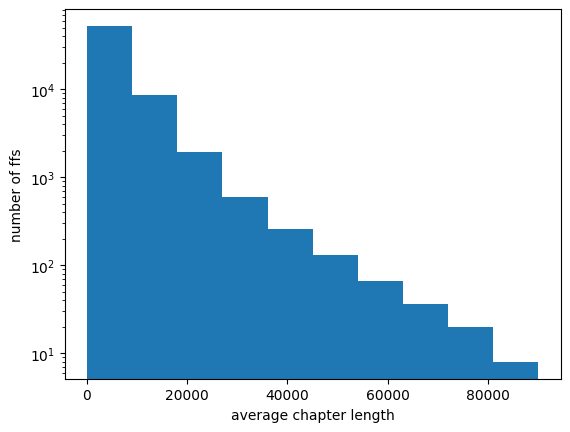

In [5]:
cnt, avg_l = np.histogram(ffji["avg_chapter_length"])
plt.hist(avg_l[:-1], avg_l, weights=cnt, log=True)
plt.xlabel("average chapter length")
plt.ylabel("number of ffs")
plt.show()

Na zgornjem grafu vidimo, da število zgodb s povprečno dolžino poglavij pada eksponentno.

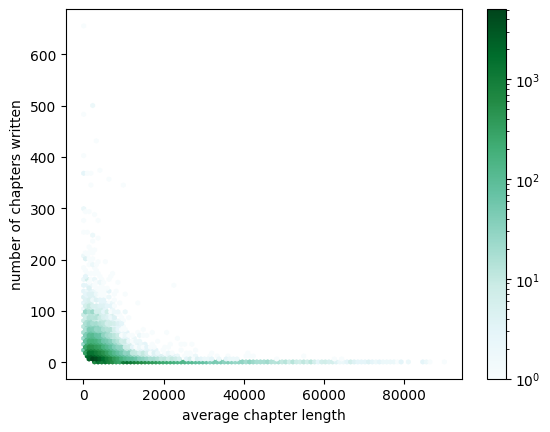

In [6]:
ffji.plot.hexbin(x="avg_chapter_length", y="chapters_written", bins='log')
plt.xlabel("average chapter length")
plt.ylabel("number of chapters written")
plt.show()

Tukaj vidimo, da so zgodbe večinoma ali z zelo malo zelo dolgimi poglavji, ali pa imajo krajša poglavja in jih je zato tudi več.

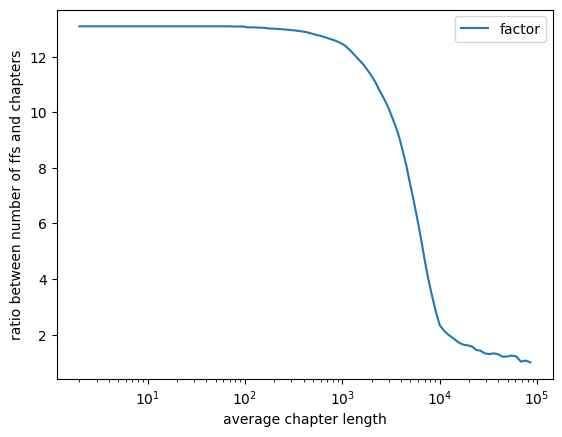

In [7]:
#   Izracuna razmerje med stevilom poglavij in stevilom zgodb s povprecno dolzino poglavij nad avg_length
def size_comparison(avg_length):
    df = ffji[ffji.avg_chapter_length >= avg_length]
    return df.chapters_written.sum() / (df.size/len(df.columns))

def get_exp_avg_lengths():
    avg_lengths = [2]
    mlen = ffji.avg_chapter_length.max()
    while avg_lengths[-1] ** 1.01 < mlen:
        avg_lengths.append(avg_lengths[-1] ** 1.01)
    return sorted(list(set(map(round, avg_lengths))))

def show_ratio():
    avg_lengths = get_exp_avg_lengths()
    razmerja = pd.DataFrame({"avg_len": avg_lengths, "factor": [size_comparison(i) for i in avg_lengths]})
    razmerja.plot(x="avg_len", y="factor", logx=True)
    plt.xlabel("average chapter length")
    plt.ylabel("ratio between number of ffs and chapters")
    plt.show()

show_ratio()

Večina zgodb z nad 10^4 besed na poglavje ima zelo malo poglavij. Zato bom od tu naprej izključil vse zgodbe z manj kot 10 napisanimi poglavji in hkrati povprečno dolžino poglavij nad 15000.

In [8]:
ffji = ffji[(ffji.chapters_written > 9) | (ffji.avg_chapter_length < 15000)]

##  K vprašanju 1

Ali imajo zgodbe v zbirkah relativno več komentarjev kot samostojne zgodbe?

ffs that are in collections have an average of 245.62020058156787 comments (per fanfiction), 15.703224533620666 comments per chapter, and 0.003975201361918874 comments per word.
ffs that are not in collections have an average of 67.08358146459477 comments (per fanfiction), 5.0299025515890525 comments per chapter, and 0.00158380159101918 comments per word.


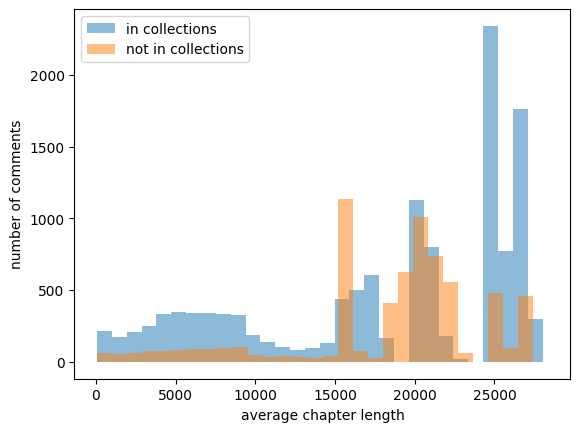

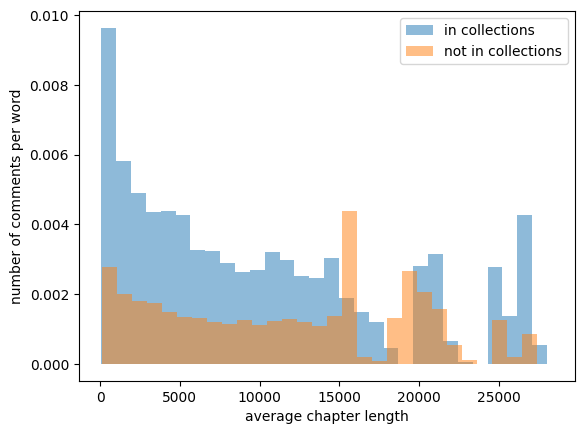

In [9]:
def plotcomments_per_weight(df, w, bnum=30, alpha=0.5):
    csum, avg_l = np.histogram(df["avg_chapter_length"], bins=bnum, weights=df["comments"])
    cnt_w, avg_l = np.histogram(df["avg_chapter_length"], bins=bnum, weights=w)
    cnt_w = pd.Series(map((lambda x: 1 if x == 0 else x), cnt_w))
    plt.hist(avg_l[:-1], avg_l, weights=csum/cnt_w, alpha=alpha)

def plotcomments(df1, df2, wf,
                 xlabel="average chapter length", ylabel="number of comments",
                 legend=["in collections", "not in collections"], bnum=30, alpha=0.5):
    plotcomments_per_weight(df1, wf(df1), bnum=bnum, alpha=alpha)
    plotcomments_per_weight(df2, wf(df2), bnum=bnum, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.show()

def Q1(ffji):
    ffji_in_coll = ffji[(ffji["collections"] != -1) & (ffji.avg_chapter_length < 30000)]
    ffji_nin_coll = ffji[(ffji["collections"] == -1) & (ffji.avg_chapter_length < 30000)]
    for (df, in_collection) in [(ffji_in_coll, ""),
                                (ffji_nin_coll, "not ")]:
        print(f"ffs that are {in_collection}in collections have an average of "
            f"{df['comments'].mean()} comments (per fanfiction), "
            f"{df['comments'].sum()/df['chapters_written'].sum()} comments per chapter, "
            f"and {df['comments'].sum()/df['words'].sum()} comments per word.")
    plotcomments(ffji_in_coll, ffji_nin_coll, lambda _: None)
    plotcomments(ffji_in_coll, ffji_nin_coll, lambda df: df["words"], ylabel="number of comments per word")

Q1(ffji)

Podatki kažejo, da imajo zgodbe, ki so v zbirkah, v veliki večini primerov več
komentarjev kot tiste, ki niso v zbirkah. Če iz podatkov odstranimo še zgodbo
"survival is a talent", ki ima daleč največ (za faktor 10) komentarjev, je to
še bolj očitno:

ffs that are in collections have an average of 245.62020058156787 comments (per fanfiction), 15.703224533620666 comments per chapter, and 0.003975201361918874 comments per word.
ffs that are not in collections have an average of 66.80056761346454 comments (per fanfiction), 5.008819117390546 comments per chapter, and 0.0015774783444298974 comments per word.


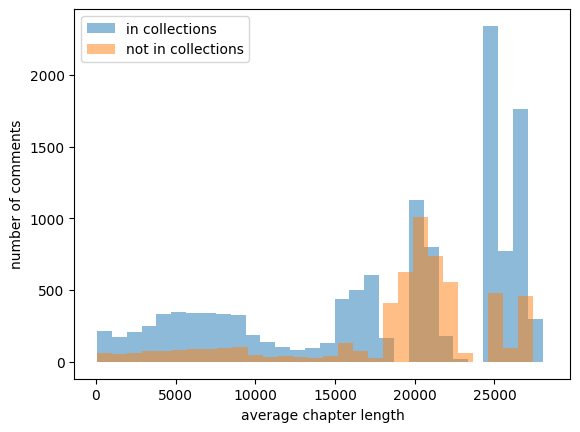

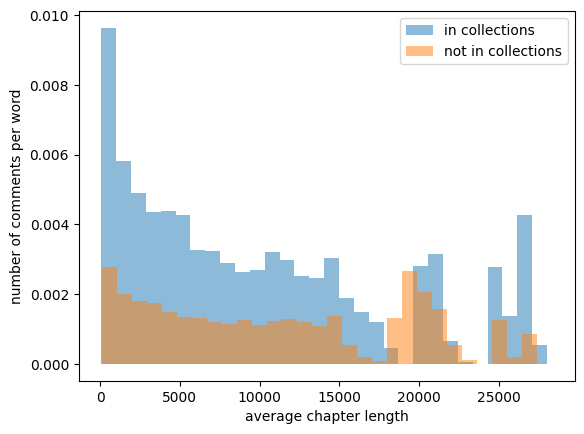

In [10]:
Q1(ffji[ffji.index != 55054])

##  K vprašanju 2

Ali imajo zgodbe z manjšo povprečno dolžino poglavij več komentarjev/kudosev/zaznamkov kot tiste z večjo?

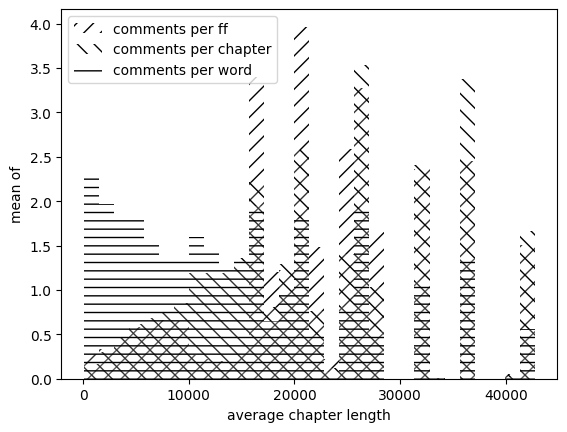

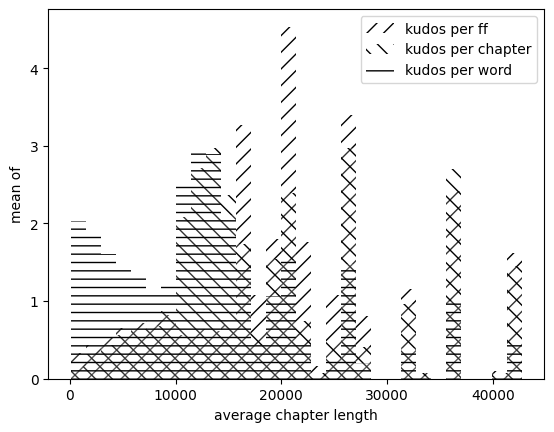

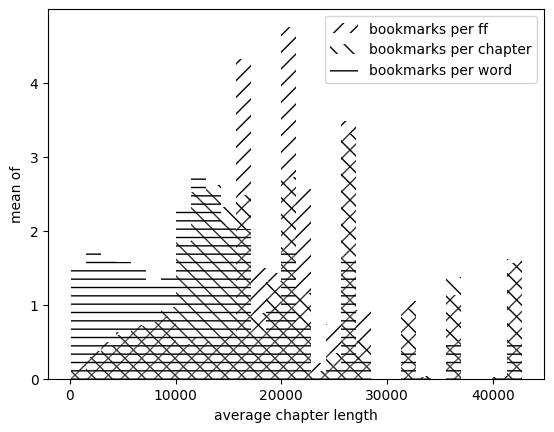

In [11]:
def normalize(ser):
    return ser/ser.mean()

def plot_over_avg_chapter_length(df, attr, legend, bnum=30, alpha=0.5):
    value_sum, avg_l = np.histogram(df["avg_chapter_length"], bins=bnum, weights=df[attr])
    def plot_attr(weights, per="ff", hatch="||"):
        cnt_w, avg_l = np.histogram(df["avg_chapter_length"], bins=bnum, weights=weights)
        cnt_w = list(map(lambda x: 1 if x == 0 else x, cnt_w))
        plt.hist(avg_l[:-1], avg_l, weights=normalize(value_sum/cnt_w), alpha=alpha, color='white', hatch=hatch)
        legend.append(f"{attr} per {per}")
    plot_attr(None, "ff", "//")
    plot_attr(df["chapters_written"], "chapter", "\\\\")
    plot_attr(df["words"], "word", "--")

def Q2(ffji):
    for attr in ["comments", "kudos", "bookmarks"]:
        legend = []
        plot_over_avg_chapter_length(ffji, attr, legend, bnum=30, alpha=0.2)
        plt.ylabel("mean of")
        plt.xlabel("average chapter length")
        plt.legend(legend)
        plt.show()

Q2(ffji)

Komentarji, kudosi in zaznamki se vsi držijo približno istih vzorcev. V zgodbah s kratkimi poglavji jih je relativno veliko na število besed in malo glede na število poglavij in na zgodbe.

##  K vprašanju 3

Ali imajo novejše zgodbe (tiste,  ki so kasneje dobile zadnje poglavje/update)
  več zadetkov na poglavje kot starejše?

Calculating boxplot, this may take some time.


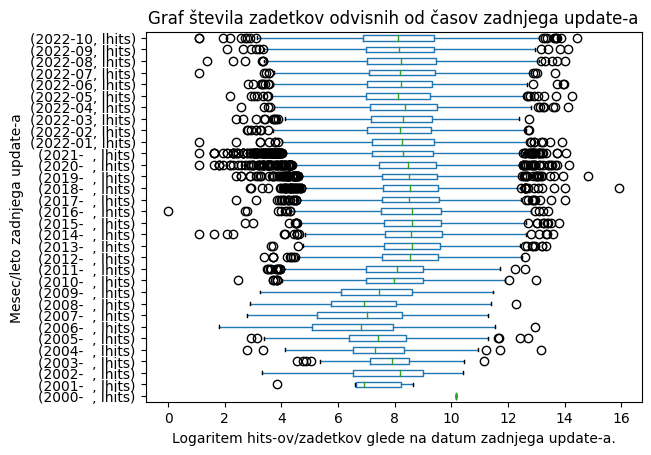

In [12]:
def Q3():
    def boxplots(df):
        print("Calculating boxplot, this may take some time.")
        df = df[df.last_updated.map(lambda d: d.year, na_action='ignore') > 1999]
        grouped = df.groupby(by=df.last_updated.apply(lambda d: f"{d.year}-{d.month:02}" if d.year >= 2022
                                                      else f"{d.year}-  "), sort=True)
        grouped.boxplot(subplots=False, column="lhits", vert=False, grid=False)
        plt.xlabel("Logaritem hits-ov/zadetkov glede na datum zadnjega update-a.")
        plt.ylabel("Mesec/leto zadnjega update-a")
        plt.title("Graf števila zadetkov odvisnih od časov zadnjega update-a")
        plt.show()

    boxplots(ffji)

Q3()

Iz grafa je razvidno, da se število zadetkov v zadnjih nekaj počasi pada. Zadnji vrh je bil leta 2013, pred tem dolina 2006 in vrh pred tem 2002.